In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=['airplane','automoblile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample (x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

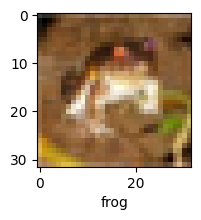

In [ ]:
plot_sample(x_train,y_train,0)

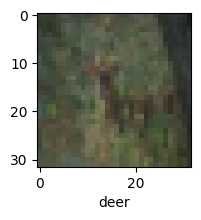

In [ ]:
plot_sample(x_train,y_train,10)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000 ,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 4ms/step - loss: 1.8099 - accuracy: 0.3557
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6214 - accuracy: 0.4288
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5399 - accuracy: 0.4567
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4786 - accuracy: 0.4789
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4315 - accuracy: 0.4983
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3862 - accuracy: 0.5150
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3507 - accuracy: 0.5219
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3147 - accuracy: 0.5384
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2820 - accuracy: 0.5507
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.25

In [ ]:
 ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3718 - accuracy: 0.5285


[1.371776819229126, 0.5285000205039978]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.61      1000
           1       0.79      0.50      0.62      1000
           2       0.34      0.61      0.43      1000
           3       0.48      0.20      0.28      1000
           4       0.52      0.35      0.42      1000
           5       0.52      0.37      0.43      1000
           6       0.45      0.76      0.57      1000
           7       0.67      0.56      0.61      1000
           8       0.64      0.67      0.65      1000
           9       0.68      0.54      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.56      0.53      0.52     10000
weighted avg       0.56      0.53      0.52     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.5525 - accuracy: 0.4389
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2053 - accuracy: 0.5760
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0807 - accuracy: 0.6225
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0101 - accuracy: 0.6471
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9527 - accuracy: 0.6675
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9072 - accuracy: 0.6857
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8713 - accuracy: 0.6987
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8280 - accuracy: 0.7134
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7949 - accuracy: 0.7260
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.76

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9142 - accuracy: 0.6940


[0.9142460227012634, 0.6940000057220459]

In [ ]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[3.06234900e-02, 2.31484184e-04, 1.43918395e-02, ...,
        2.52352795e-04, 4.07359928e-01, 5.77455619e-04],
       [2.67033745e-02, 3.55472326e-01, 5.48516755e-06, ...,
        1.64795608e-08, 6.13560617e-01, 4.24891151e-03],
       [1.96594149e-01, 4.65162724e-01, 3.90506722e-03, ...,
        4.61808027e-04, 2.42608503e-01, 8.08045864e-02],
       ...,
       [2.61951413e-04, 1.29015604e-07, 8.50702822e-01, ...,
        1.57447141e-02, 9.18451042e-05, 6.63927058e-05],
       [1.01267196e-01, 4.54081595e-01, 6.18945668e-03, ...,
        2.28922558e-03, 6.16977515e-04, 3.07310233e-03],
       [4.54309084e-05, 1.81163166e-04, 1.88742147e-03, ...,
        9.72709656e-01, 7.86327746e-06, 2.26736622e-04]], dtype=float32)